In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.io import fits
from astropy import modeling
from scipy.signal import find_peaks

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

From Ragunathan et al. (2016)

(1) Create a window with width Wwidth centred on each pixel of
the spectrum containing Npix pixels and record the window Wmax
containing the maximum deviation.

(2) Average the flux values in Wmax.

(3) Steps 1 and 2 are repeated Wpass times until the entire spectrum
is averaged out for the chosen window size.

(4) Repeat steps 1 through 3 for Wtotal window sizes

Median used for pseudo spectrum to better capture the emission features but not absorption features

Wtotal=11
Npixel= 30 pixels

Wwidth =
 2^x for runs 1 ≤ x ≤ 6
2^{11−(x−1)} for runs 7 ≤ x ≤ 11

Wpass =
 Npix for 1 ≤ x ≤ 6
Npix/{11−(x−1)} for 7 ≤ x ≤ 11

Questions:
              -I don't understand distinction between windown width and Npix value, don't they set each other
              -What is the Wmax we are recording? Max value in the window? why?

In [2]:
#This is sloppy, must be cleaner np way to write the median replacements?
#also i think my slices are going past 0 and top index of array which is no-bueno

def window_median(data,Npix):
    n_data = np.array(data)
    for i in range(len(data)):
        n_data[i]=np.median(data[int(i-Npix/2):int(i+Npix/2)]) #why do i need these int fns? shouldn't they be ints?
            
    return n_data

/Users/napolilg/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/napolilg/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


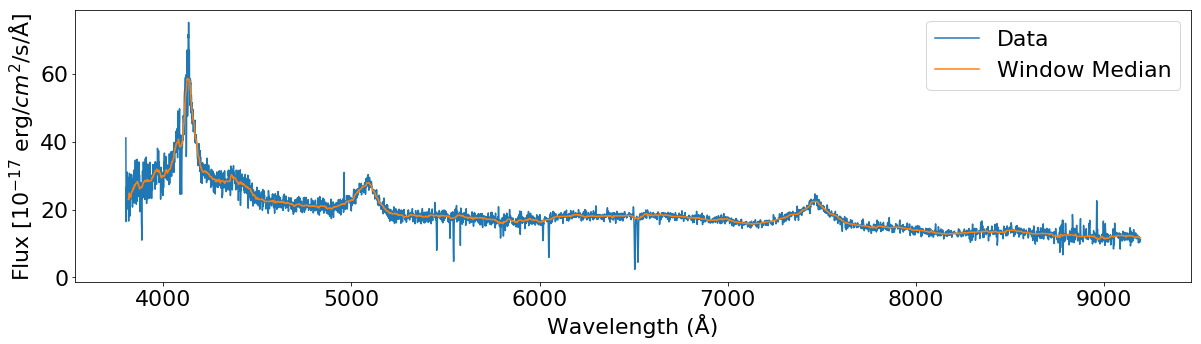

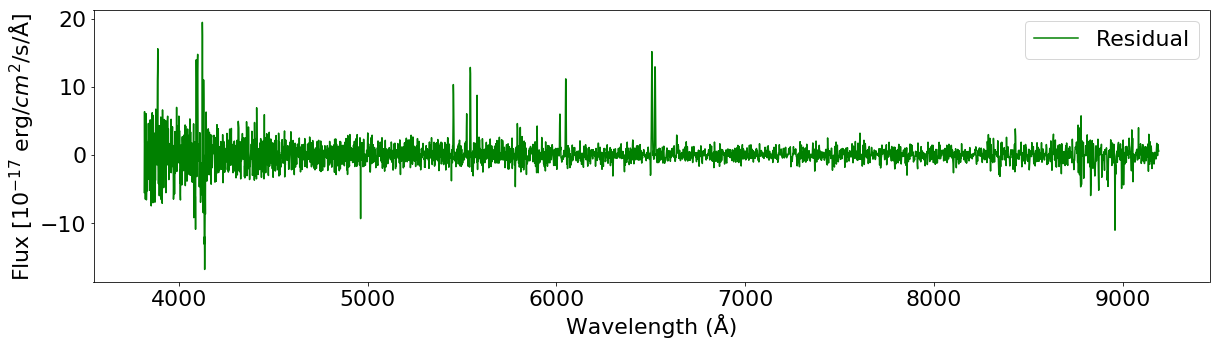

In [40]:
#Plotting SDSS quasar at the moment because the cori server is down when i'm writing this. should be 'easily' replaced.
#open fits file
m_hdul = fits.open('spec-0270-51909-0213.fits')
m_data = m_hdul[1].data

#perform a window median run
one_run=window_median(m_data.field(0),30)

#calculate residual
residual=one_run-m_data.field(0)

#determine x_range from wavelength data
x_spc=10**m_data.field(1)


fig = plt.figure(figsize=(20,5))
#plot window median-ed data  vs. initial data 
plt.plot(x_spc,m_data.field(0),label='Data')
plt.plot(x_spc,one_run,label='Window Median')
plt.legend()
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux [$10^{-17}$ erg/$cm^2$/s/Å]')
plt.show()

fig = plt.figure(figsize=(20,5))
#plot residual
plt.plot(x_spc,residual,c='g',label='Residual')
plt.legend()
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux [$10^{-17}$ erg/$cm^2$/s/Å]')
plt.show()


Peak Locations =  [3887.765  4091.6653 4099.2085 4123.8223 4130.4746 5453.8105 5543.7026
 6049.227  6505.7876 6522.2876]
Peak Widths =  [4.03179026 5.36943531 3.87811184 4.24769783 1.23985291 4.24831486
 4.06938362 4.01002121 2.03167534 6.12528419]


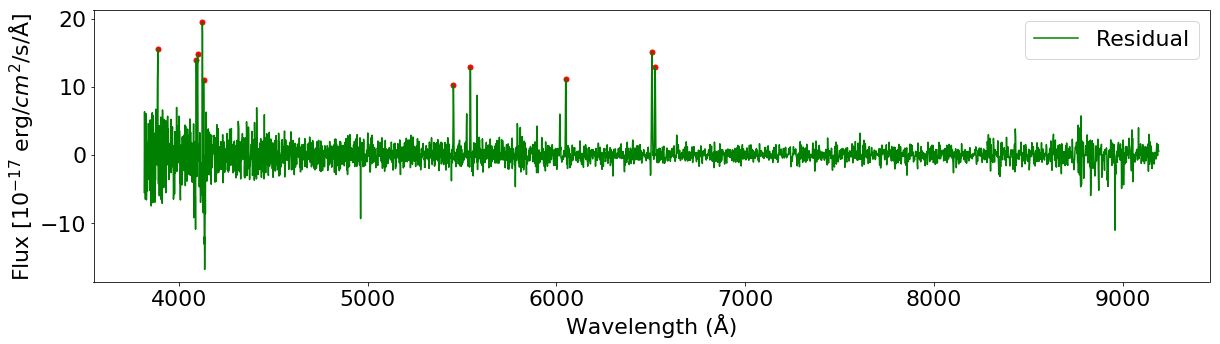

In [41]:

#find_peaks docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html

#arbitrarily looking at peaks over max_val/2, should improve criteria
#width is passed only so that width values are returned in dictionary
peaks=find_peaks(residual,height=np.nanmax(residual)/2,width=1)
#peaks[0] is array indices, peaks[1] is dictionary with passed params

#appears to be z=1.32 for MgII feature at 6505,6522. Line seperation matches at ~7 angstroms

print('Peak Locations = ',x_spc[peaks[0]])
print('Peak Widths = ',peaks[1]["width_heights"])

fig = plt.figure(figsize=(20,5))

plt.scatter(x_spc[peaks[0]],peaks[1]["peak_heights"],c='r',s=25)
plt.plot(x_spc,residual,c='g',label='Residual')
plt.xlabel('Wavelength (Å)')
plt.ylabel('Flux [$10^{-17}$ erg/$cm^2$/s/Å]')
plt.legend()
plt.show()

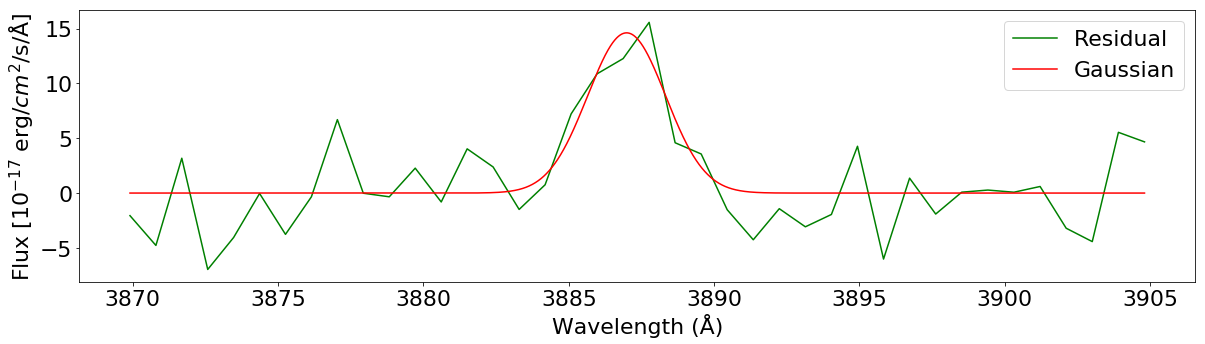

Height: 14.612340540416627 +\- 2.4669667528601034
Center: 3886.9900819746845 +\- 0.26180357140277605
FWHM  : 3.156768811101601 +\- 0.6154148047421284



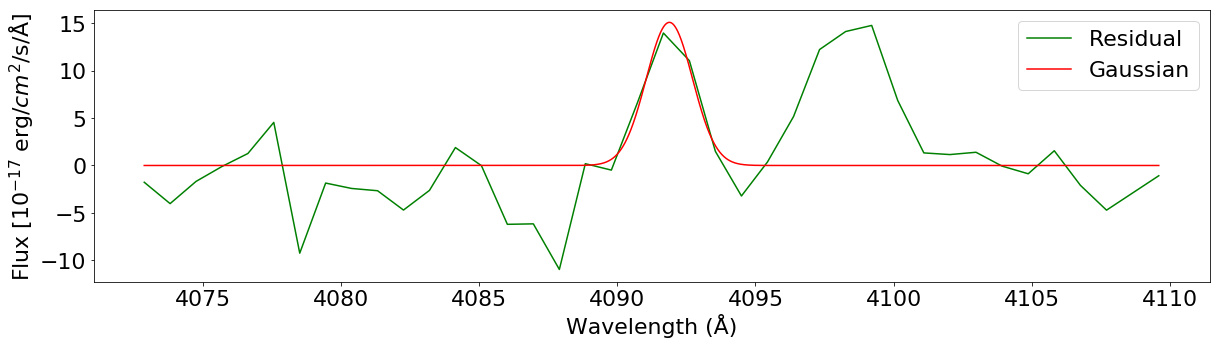

Height: 15.07326258922709 +\- 5.237834463001769
Center: 4091.8821949149415 +\- 0.3376097782782339
FWHM  : 1.969179185235989 +\- 0.7886136405233691



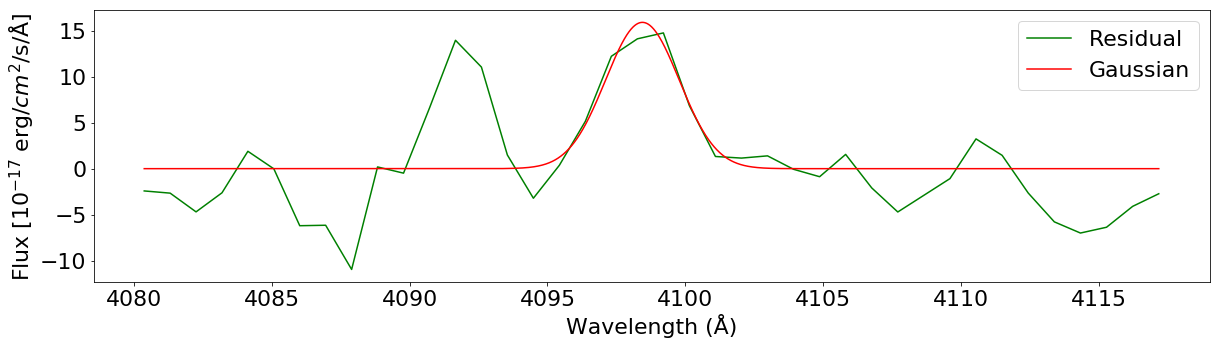

Height: 15.897252051604374 +\- 3.6650530912024175
Center: 4098.446823506573 +\- 0.35525421147071207
FWHM  : 3.135940502525981 +\- 0.8350194037888383



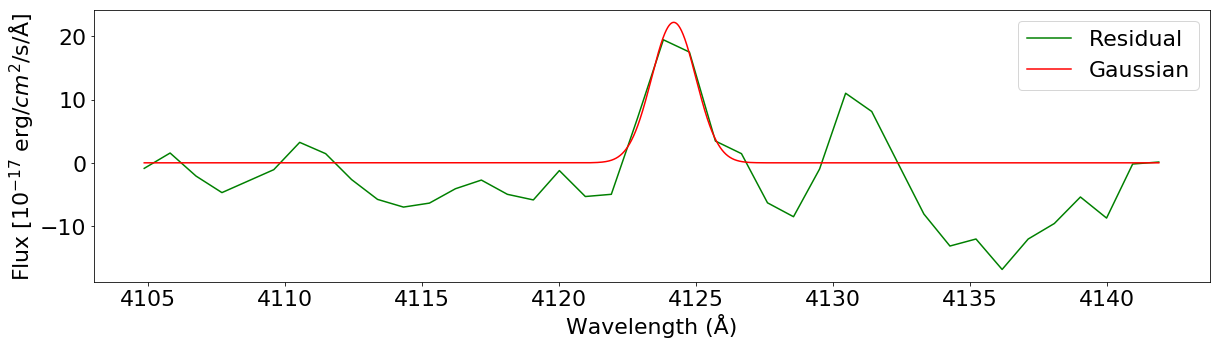

Height: 22.197667139565176 +\- 6.819125556941794
Center: 4124.201267891877 +\- 0.27595452212192545
FWHM  : 1.894054013524335 +\- 0.6891210057563019



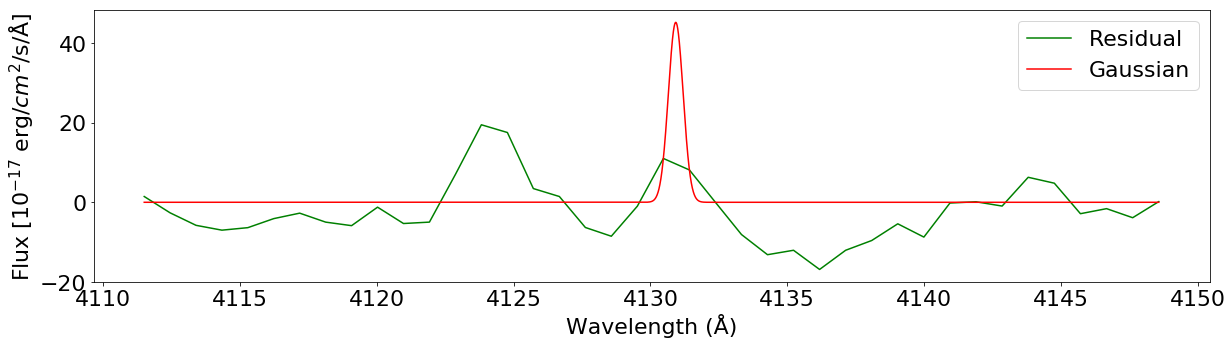

Height: 45.140330797348255 +\- 673122.8722614604
Center: 4130.927512591293 +\- 223.81324497181268
FWHM  : 0.633272391129906 +\- 3055.0460391316765



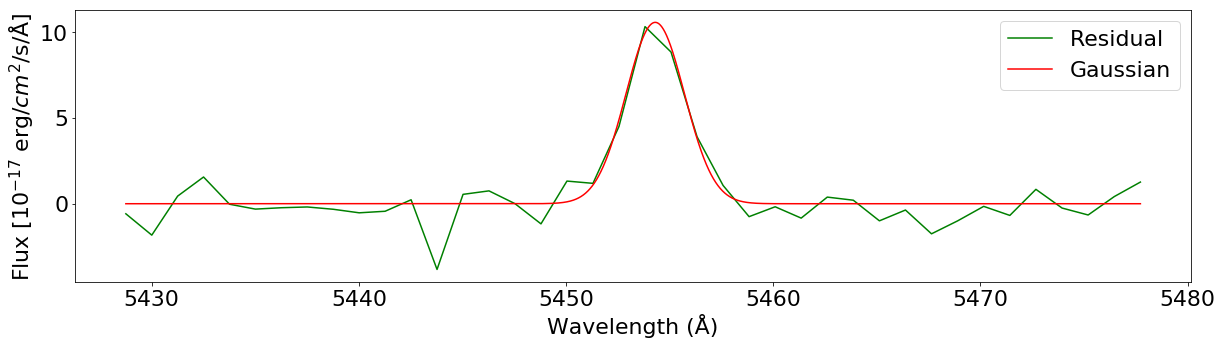

Height: 10.553674756386377 +\- 0.8582942956603591
Center: 5454.304143285351 +\- 0.13252297225143808
FWHM  : 3.3146522518130297 +\- 0.31139751603391363



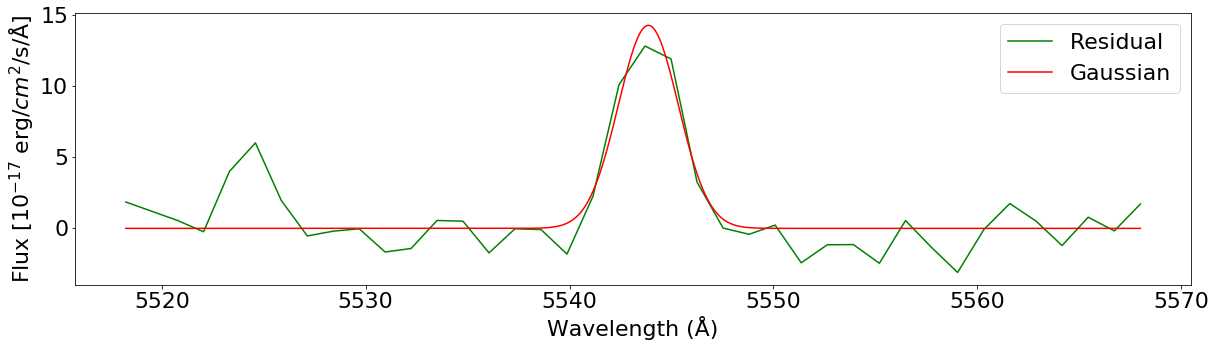

Height: 14.280309241222577 +\- 1.510946211420542
Center: 5543.868793089957 +\- 0.18002600766007074
FWHM  : 3.4626388113858377 +\- 0.4230538808060586



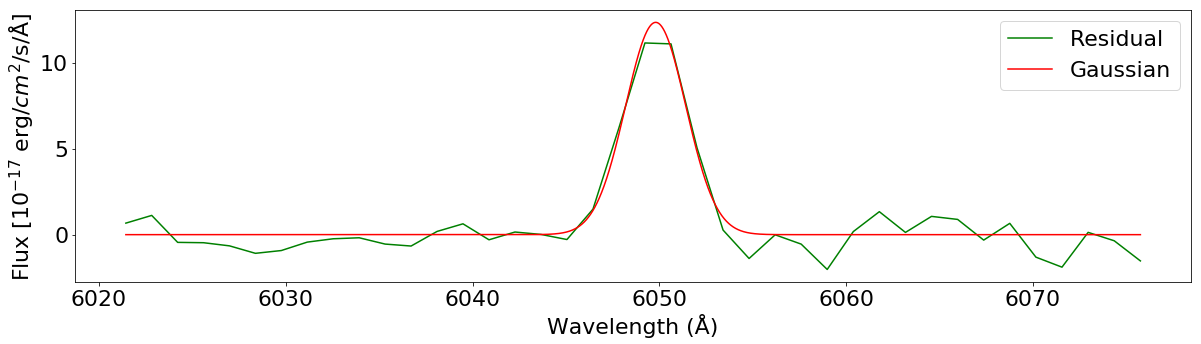

Height: 12.343540892268544 +\- 0.716958508633582
Center: 6049.80306138211 +\- 0.10794274955383525
FWHM  : 3.787364697525895 +\- 0.254006095899178



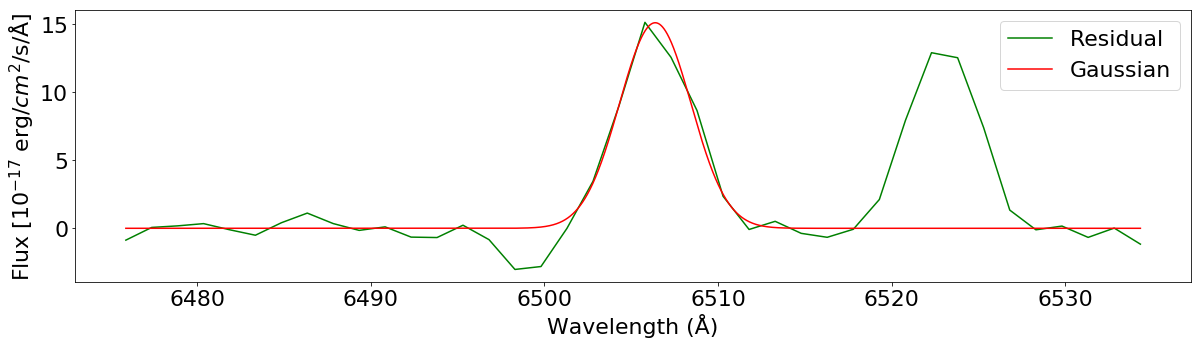

Height: 15.116626365397657 +\- 2.815888663556796
Center: 6506.3801203690755 +\- 0.4427189379773516
FWHM  : 4.840854656031124 +\- 1.0410973823731853



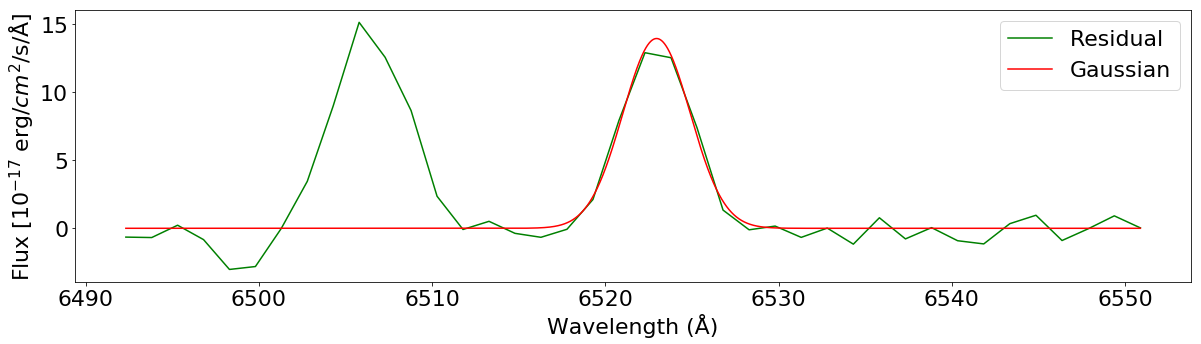

Height: 13.956230989530198 +\- 3.2320486556881103
Center: 6522.956746377698 +\- 0.5189364541347015
FWHM  : 4.564637427923128 +\- 1.2204550453554575



In [42]:

fitter = modeling.fitting.LevMarLSQFitter()
#how large should bin box be around the peaks to fit a gaussian?
sub_region_size=20

for i in peaks[0]:
    #define subregion in x and y
    x_reg=x_spc[i-sub_region_size:i+sub_region_size]
    y_reg=residual[i-sub_region_size:i+sub_region_size]
    
    #fit a gaussian using priors of amplitude=max in region and center=peak location
    model = modeling.models.Gaussian1D(amplitude=np.nanmax(y_reg),mean=np.average(x_reg),stddev=1)
    fitted_model = fitter(model=model, x=x_reg, y=y_reg)
    #errors from covariance matrix
    cov_diag = np.diag(fitter.fit_info['param_cov'])

    #define fine x_region to plot gaussian
    x_lins=np.linspace(x_reg[0],x_reg[-1],10000)
    fig = plt.figure(figsize=(20,5))

    plt.plot(x_reg,y_reg,c='g',label='Residual')
    #plt.plot(x_reg,m_reg)
    plt.plot(x_lins,fitted_model(x_lins),c='r',label='Gaussian')
    plt.xlabel('Wavelength (Å)')
    plt.ylabel('Flux [$10^{-17}$ erg/$cm^2$/s/Å]')
    plt.legend()
    plt.show()
    
    #Print Gaussian details
    print('Height: {} +\- {}'.format(fitted_model.amplitude.value, np.sqrt(cov_diag[0])))
    print('Center: {} +\- {}'.format(fitted_model.mean.value, np.sqrt(cov_diag[1])))
    #For a gaussian FWHM=2.355*sigma
    print('FWHM  : {} +\- {}'.format(2.35*fitted_model.stddev.value, 2.35*np.sqrt(cov_diag[2])))
    #from astropy docs: http://learn.astropy.org/rst-tutorials/Models-Quick-Fit.html
    print()

Model: CompoundModel93
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=5., mean=0., stddev=1.)>

    [1]: <Gaussian1D(amplitude=5., mean=7., stddev=1.)>
Parameters:
    amplitude_0 mean_0 stddev_0 amplitude_1 mean_1 stddev_1
    ----------- ------ -------- ----------- ------ --------
            5.0    0.0      1.0         5.0    7.0      1.0


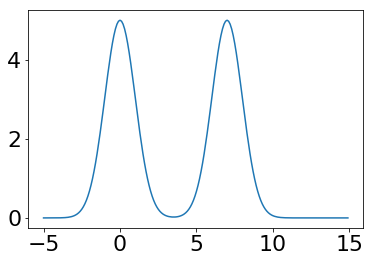

In [36]:
#Next Steps, maybe instead of fitting a single gaussian we can attempt two offset gaussians to MgII?

model = modeling.models.Gaussian1D(amplitude=5,mean=0,stddev=1)+modeling.models.Gaussian1D(amplitude=5,mean=7,stddev=1)
print(model)
x_spc=np.arange(-5,15,0.1)
plt.plot(x_spc,model(x_spc))
plt.show()

z =  0.3902976788664172
Expected Doublet Seperation =  9.97844450076005 Å


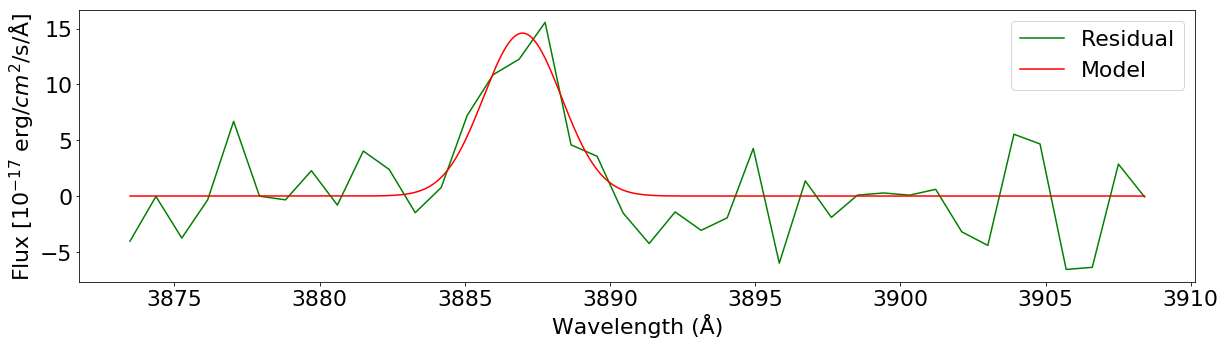

Peak 1 Height: 14.604716001006473 
Peak 1 Center: 3886.9864043680086 
Peak 1 FWHM  : 3.1613465792298365 

Peak 2 Height: 3.2553190123703075 
Peak 2 Center: 3893.9017060670594 
Peak 2 FWHM  : 2.762411724432376e-38 


z =  0.4632141868443227
Expected Doublet Seperation =  10.501780861819073 Å


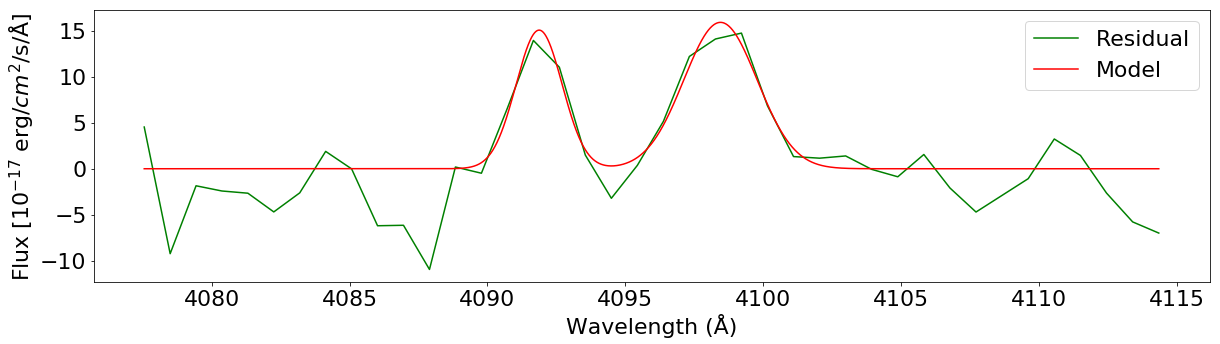

Peak 1 Height: 15.07346270910801 +\- 4.036303258274011
Peak 1 Center: 4091.8735683885957 +\- 0.26664458884618625
Peak 1 FWHM  : 1.9682344078845149 +\- 0.5980844343780782

Peak 2 Height: 15.917654507443325 +\- 3.0919421866412136
Peak 2 Center: 4098.448377425897 +\- 0.3019650135999037
Peak 2 FWHM  : 3.127358784681732 +\- 0.6974132352730386


z =  0.4659117037114182
Expected Doublet Seperation =  10.52114147987759 Å


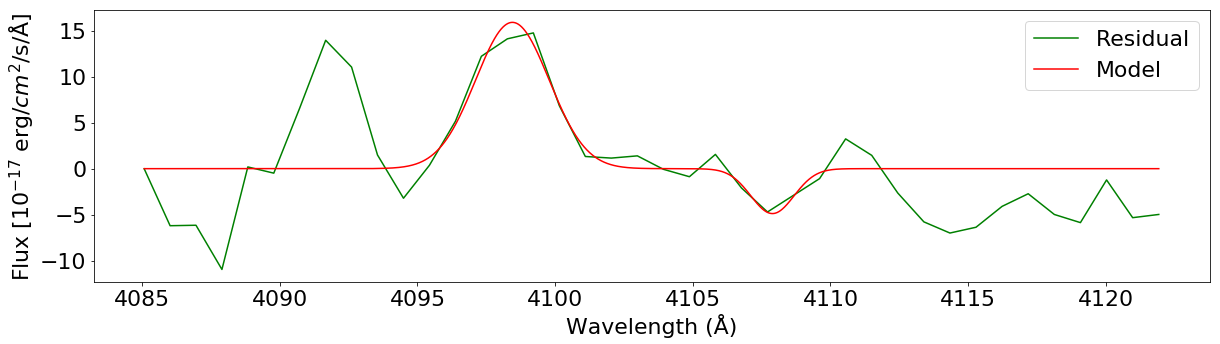

Peak 1 Height: 15.897199948578722 
Peak 1 Center: 4098.447075010094 
Peak 1 FWHM  : 3.135960773439005 

Peak 2 Height: -4.879007871760105 
Peak 2 Center: 4107.8920404037335 
Peak 2 FWHM  : 1.8382547401288836 


z =  0.474713796325809
Expected Doublet Seperation =  10.584315858989596 Å


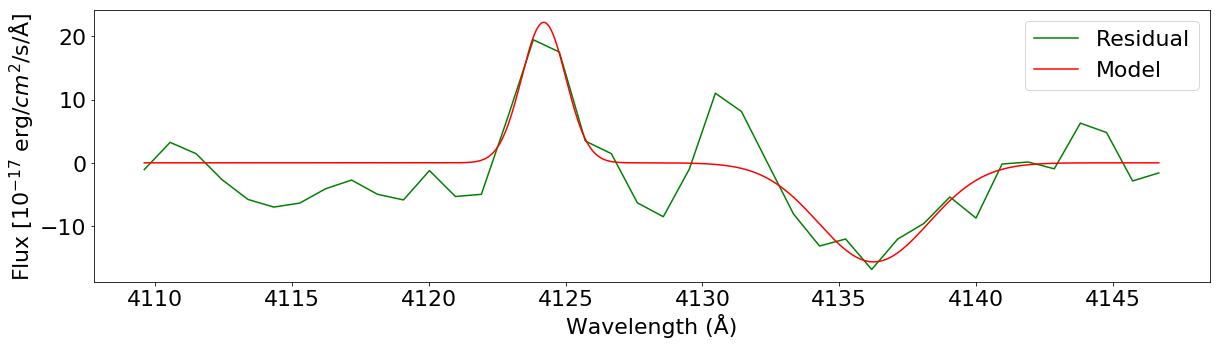

Peak 1 Height: 22.197852745868 +\- 5.164399570763861
Peak 1 Center: 4124.202686814417 +\- 0.21630274613143505
Peak 1 FWHM  : 1.8940401514659253 +\- 0.5130660933344432

Peak 2 Height: -15.652871515268304 +\- 3.0149057868027462
Peak 2 Center: 4136.254074052786 +\- 0.4496607571594202
Peak 2 FWHM  : 4.726847810136652 +\- 1.0484072594085951


z =  0.47709273083707604
Expected Doublet Seperation =  10.601389947763861 Å


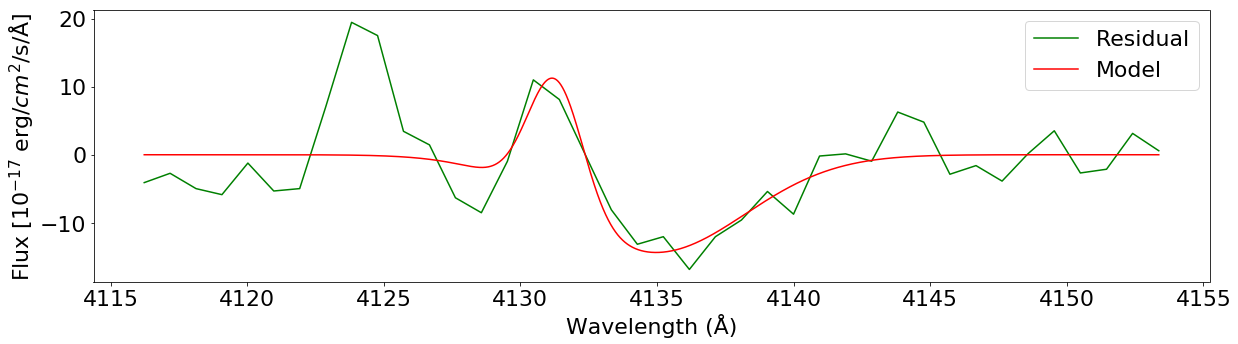

Peak 1 Height: 19.068749681303323 
Peak 1 Center: 4131.29649674959 
Peak 1 FWHM  : 2.363143562875724 

Peak 2 Height: -14.381815885663258 
Peak 2 Center: 4134.898787872436 
Peak 2 FWHM  : 7.8132775703464326 


z =  0.9503288788816926
Expected Doublet Seperation =  13.997900429509684 Å


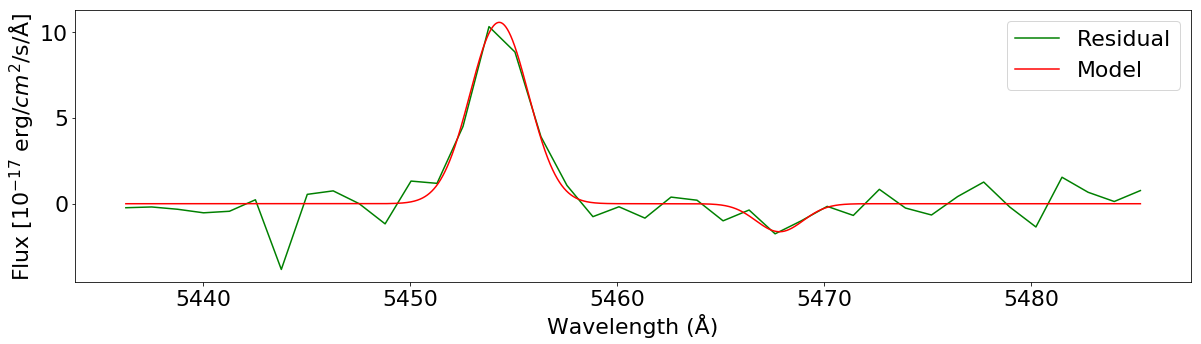

Peak 1 Height: 10.553587555577625 
Peak 1 Center: 5454.305234272279 
Peak 1 FWHM  : 3.314706353004641 

Peak 2 Height: -1.6294980544964386 
Peak 2 Center: 5467.852782220776 
Peak 2 FWHM  : 2.674251301544896 


z =  0.9824750521487031
Expected Doublet Seperation =  14.228619944281672 Å


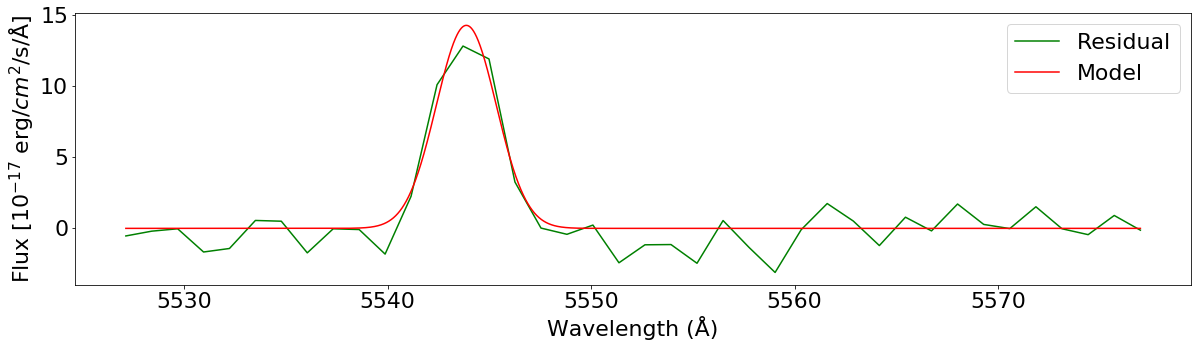

Peak 1 Height: 14.280393642453985 
Peak 1 Center: 5543.866893059318 
Peak 1 FWHM  : 3.46259521207821 

Peak 2 Height: -8.356321744950481 
Peak 2 Center: 5558.715036681948 
Peak 2 FWHM  : 2.762411724432376e-38 


z =  1.1632548675184866
Expected Doublet Seperation =  15.526112835153683 Å


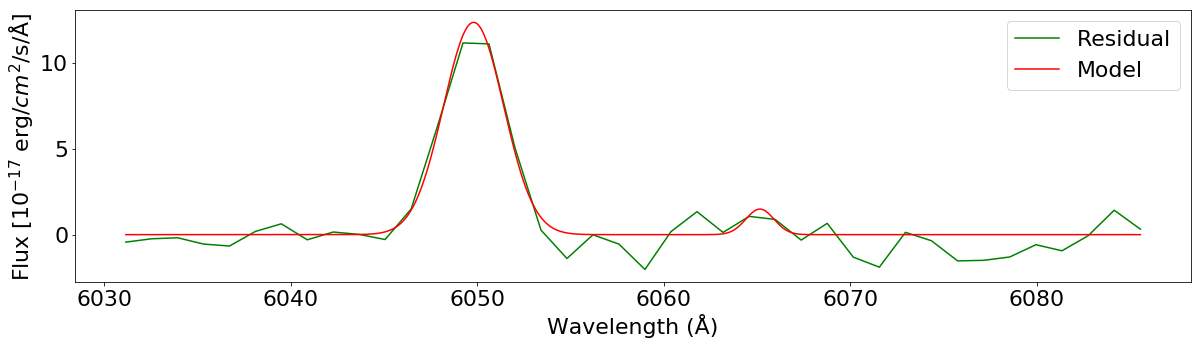

Peak 1 Height: 12.342132651764276 
Peak 1 Center: 6049.79744927868 
Peak 1 FWHM  : 3.788195648127357 

Peak 2 Height: 1.486653194771628 
Peak 2 Center: 6065.149228773179 
Peak 2 FWHM  : 1.7710559658748306 


z =  1.326524788956911
Expected Doublet Seperation =  16.69793371530154 Å


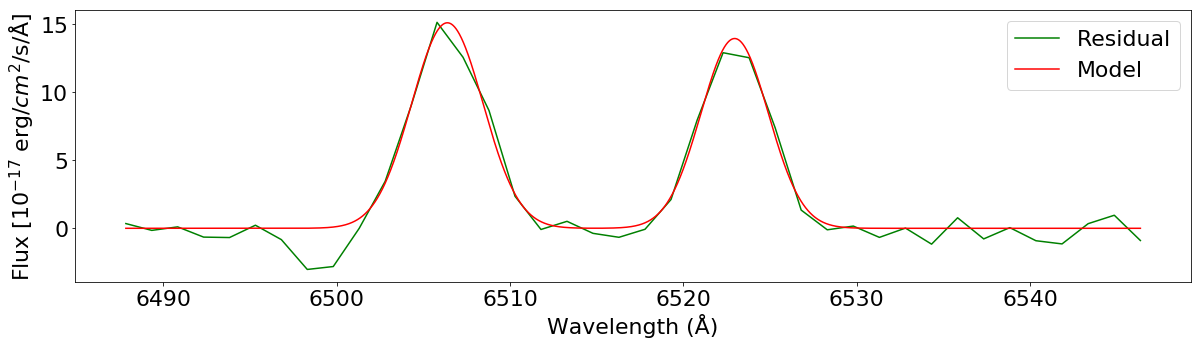

Peak 1 Height: 15.113172000836437 +\- 0.7859961441726608
Peak 1 Center: 6506.382767215458 +\- 0.12517333723071136
Peak 1 FWHM  : 4.842643425052706 +\- 0.2889292754724888

Peak 2 Height: 13.956268774929965 +\- 0.8133094744524543
Peak 2 Center: 6522.955475926714 +\- 0.13238943048881513
Peak 2 FWHM  : 4.564612484042992 +\- 0.3049303981275109


z =  1.3324253288133945
Expected Doublet Seperation =  16.740283069959496 Å


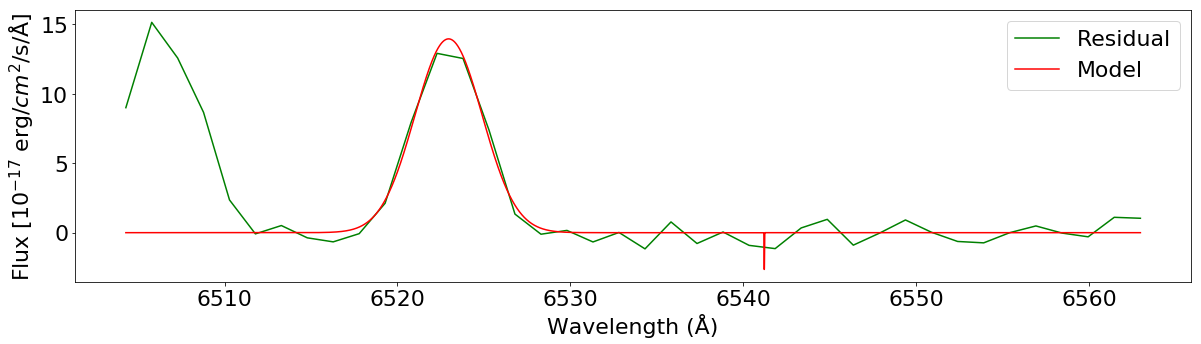

Peak 1 Height: 13.95621082002728 
Peak 1 Center: 6522.955475539217 
Peak 1 FWHM  : 4.564649969474965 

Peak 2 Height: -2.703652217032438 
Peak 2 Center: 6541.2143281028575 
Peak 2 FWHM  : 0.025013703333965426 




In [82]:
#ok so thats like really really easy, lets try applying to the data we have
fitter = modeling.fitting.LevMarLSQFitter()
sub_region_size=20


#for now lets use the same peaks detected as one peak, but use the two peak model

# Mg_ii lines 2796.3543 and 2803.5315
rest_frame_sep=7.1772
#setting initial peak seperation to be the seperation we would expect for Mg-II at the observed wavelength

for i in peaks[0]:
    #determine redshift if this is an Mg-II feature
    z=x_spc[i]/2796.3543-1
    print("z = ",z)
    line_sep=rest_frame_sep*(1+z)
    print("Expected Doublet Seperation = ",line_sep,"Å")
    
    #define subregion in x and y
    h_ls=int(line_sep/2)
    x_reg=x_spc[i-sub_region_size+h_ls:i+sub_region_size+h_ls]
    y_reg=residual[i-sub_region_size+h_ls:i+sub_region_size+h_ls]
    
    #fit two gaussians seperated by peak_offset using priors of amplitude=max in region and mean=peak location
    model = modeling.models.Gaussian1D(amplitude=np.nanmax(y_reg),mean=np.average(x_reg)-h_ls,stddev=1)
    
    #second gaussian has mean = peak location + calculated line_sep
    model = model+modeling.models.Gaussian1D(amplitude=np.nanmax(y_reg),mean=np.average(x_reg)+h_ls,stddev=1)

    fitted_model = fitter(model=model, x=x_reg, y=y_reg)

    #define fine x_region to plot gaussian
    x_lins=np.linspace(x_reg[0],x_reg[-1],10000)
    fig = plt.figure(figsize=(20,5))

    plt.plot(x_reg,y_reg,c='g',label='Residual')
    #plt.plot(x_reg,m_reg)
    plt.plot(x_lins,fitted_model(x_lins),c='r',label='Model')
    plt.xlabel('Wavelength (Å)')
    plt.ylabel('Flux [$10^{-17}$ erg/$cm^2$/s/Å]')
    plt.legend()
    plt.show()
    
    #errors from covariance matrix 
    #fits where the second gaussian is non-existant don't populate a covariance matrix which throws a error here
    #definitely a cleaner approach is possible
    #if it falls to create the covariance matrix is that reason enough to toss it? This data would suggest yes
    try:
        cov_diag = np.diag(fitter.fit_info['param_cov'])
    except:
        print('Peak 1 Height: {} '.format(fitted_model.parameters[0]))
        print('Peak 1 Center: {} '.format(fitted_model.parameters[1]))
        print('Peak 1 FWHM  : {} '.format(2.35*fitted_model.parameters[2]))
        print()
        print('Peak 2 Height: {} '.format(fitted_model.parameters[3]))
        print('Peak 2 Center: {} '.format(fitted_model.parameters[4]))
        print('Peak 2 FWHM  : {} '.format(2.35*fitted_model.parameters[5]))
        print()
        print()
        continue
    cov_diag = np.diag(fitter.fit_info['param_cov'])

    print('Peak 1 Height: {} +\- {}'.format(fitted_model.parameters[0], np.sqrt(cov_diag[0])))
    print('Peak 1 Center: {} +\- {}'.format(fitted_model.parameters[1], np.sqrt(cov_diag[1])))
    print('Peak 1 FWHM  : {} +\- {}'.format(2.35*fitted_model.parameters[2], 2.35*np.sqrt(cov_diag[2])))
    print()
    print('Peak 2 Height: {} +\- {}'.format(fitted_model.parameters[3], np.sqrt(cov_diag[3])))
    print('Peak 2 Center: {} +\- {}'.format(fitted_model.parameters[4], np.sqrt(cov_diag[4])))
    print('Peak 2 FWHM  : {} +\- {}'.format(2.35*fitted_model.parameters[5], 2.35*np.sqrt(cov_diag[5])))
    print()
    print()